In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [235]:
df = pd.read_csv('/content/AB_NYC_2019.csv')

# Análise

In [236]:
# esse método cat.codes é só pra fazer uma análise sem precisar usar label encoder

df['neighbourhood_group']= df['neighbourhood_group'].astype("category").cat.codes
df['neighbourhood'] = df['neighbourhood'].astype("category").cat.codes
df['room_type'] = df['room_type'].astype("category").cat.codes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

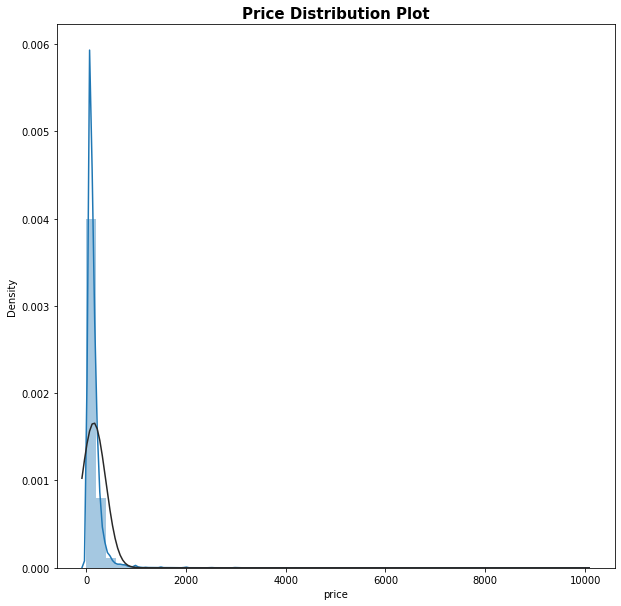

In [237]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [238]:
df['price_log'] = np.log(df.price+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

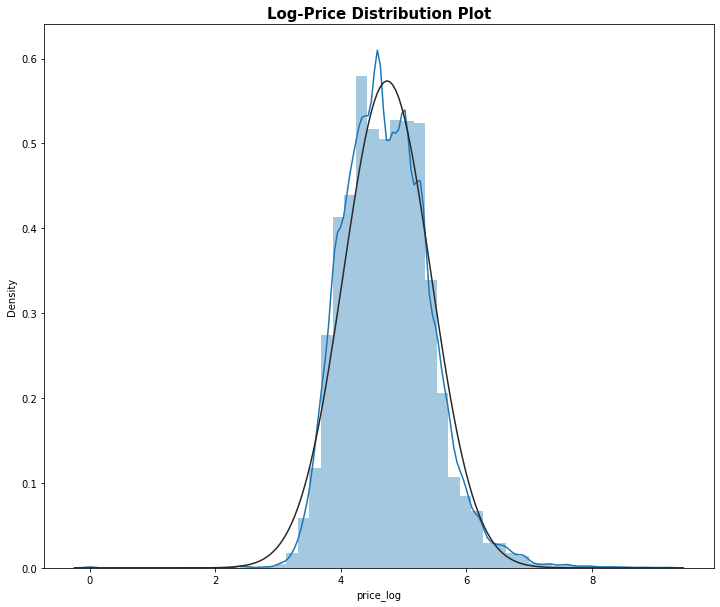

In [239]:
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

# Limpeza

In [240]:
# tirando colunas que nao serão usadas
df = df.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])

In [241]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

In [242]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)

In [243]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

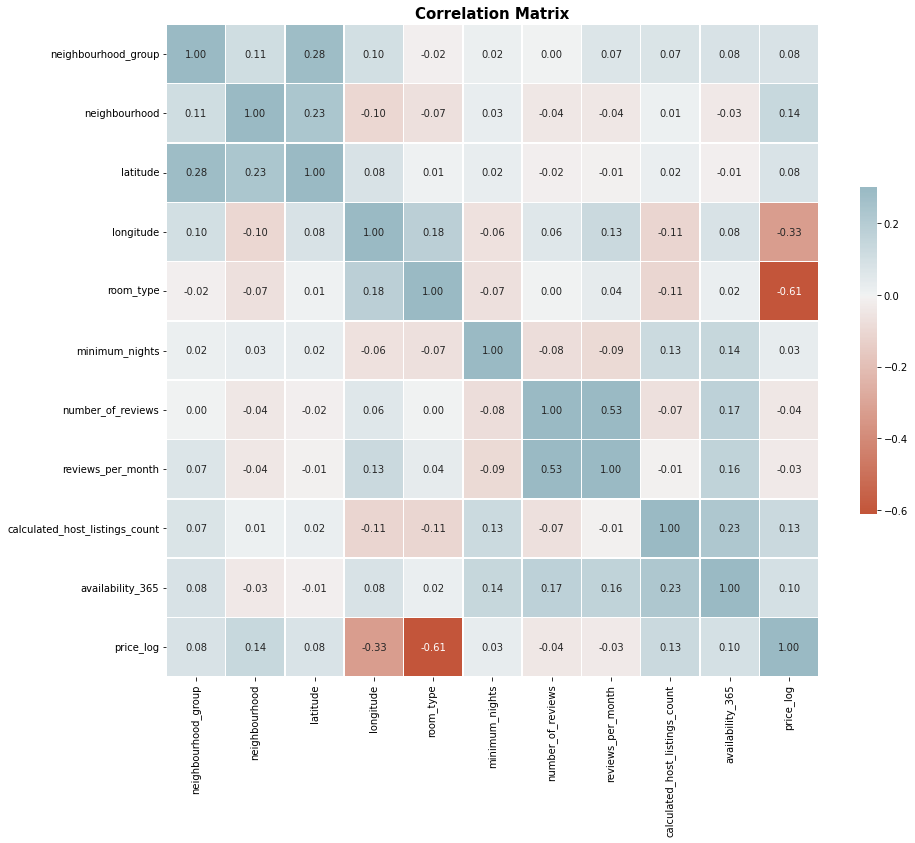

In [244]:
plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
corr=df.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [245]:
df_x = df.iloc[:,:-1]
df_x

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,40.64749,-73.97237,1,1,9,0.210000,6,365
1,2,127,40.75362,-73.98377,0,1,45,0.380000,2,355
2,2,94,40.80902,-73.94190,1,3,0,1.373221,1,365
3,1,41,40.68514,-73.95976,0,1,270,4.640000,1,194
4,2,61,40.79851,-73.94399,0,10,9,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,1,2,0,1.373221,2,9
48891,1,28,40.70184,-73.93317,1,4,0,1.373221,2,36
48892,2,94,40.81475,-73.94867,0,10,0,1.373221,1,27
48893,2,95,40.75751,-73.99112,2,1,0,1.373221,6,2


In [246]:
df_y = df.iloc[:,-1]
df_y

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price_log, Length: 48895, dtype: float64

# Normalização e Divisão

In [247]:
# normalização

scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

In [248]:
# divisão

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

In [249]:
# essa etapa aqui é pra mostrar que o neighborhood group e room type são irrelevantes, mas tá dando erro de RAM

"""
lab_enc = preprocessing.LabelEncoder()

feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(X_train,lab_enc.fit_transform(y_train))

plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=df.iloc[:,:-1].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
"""

"\nlab_enc = preprocessing.LabelEncoder()\n\nfeature_model = ExtraTreesClassifier(n_estimators=50)\nfeature_model.fit(X_train,lab_enc.fit_transform(y_train))\n\nplt.figure(figsize=(7,7))\nfeat_importances = pd.Series(feature_model.feature_importances_, index=df.iloc[:,:-1].columns)\nfeat_importances.nlargest(10).plot(kind='barh')\nplt.show()\n"

# Treino - k Fold = 5

In [250]:
### Linear Regression ###

def linear_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_LR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_LR = GridSearchCV(estimator=model_LR,  
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_LR.fit(input_x, input_y)
    best_parameters_LR = grid_search_LR.best_params_  
    best_score_LR = grid_search_LR.best_score_ 
    print(best_parameters_LR)
    print(best_score_LR)


# linear_reg(df_x, df_y)

In [251]:
### Ridge Regression ###

def ridge_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Ridge= Ridge()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_Ridge = GridSearchCV(estimator=model_Ridge,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_Ridge.fit(input_x, input_y)
    best_parameters_Ridge = grid_search_Ridge.best_params_  
    best_score_Ridge = grid_search_Ridge.best_score_ 
    print(best_parameters_Ridge)
    print(best_score_Ridge)
    
# ridge_reg(df_x, df_y)

In [252]:
### Lasso Regression ###

def lasso_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_Lasso= Lasso()

    # prepare a range of alpha values to test
    alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_lasso = GridSearchCV(estimator=model_Lasso,  
                         param_grid=(dict(alpha=alphas, normalize= normalizes)),
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_lasso.fit(input_x, input_y)
    best_parameters_lasso = grid_search_lasso.best_params_  
    best_score_lasso = grid_search_lasso.best_score_ 
    print(best_parameters_lasso)
    print(best_score_lasso)

# lasso_reg(df_x, df_y)

In [253]:
### K-Fold Cross Validation ###

kfold_cv=KFold(n_splits=5)
for train_index, test_index in kfold_cv.split(df_x,df_y):
    X_train, X_test = df_x[train_index], df_x[test_index]
    y_train, y_test = df_y[train_index], df_y[test_index]

# Previsão

In [254]:
##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)

#Ridge Model
ridge_model = Ridge(alpha = 0.01, normalize = True)
ridge_model.fit(X_train, y_train)             
pred_ridge = ridge_model.predict(X_test) 

#Lasso Model
Lasso_model = Lasso(alpha = 0.001, normalize =False)
Lasso_model.fit(X_train, y_train)
pred_Lasso = Lasso_model.predict(X_test) 

In [255]:
print('------------- Linear Regression Fold = 5 -----------')

print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

------------- Linear Regression Fold = 5 -----------
MAE: 0.391340
RMSE: 0.538368
R2 0.497618


In [256]:
print('--------------- Ridge Fold = 5 ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, pred_ridge))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge)))   
print('R2 %f' % r2_score(y_test, pred_ridge))

--------------- Ridge Fold = 5 ---------------------
MAE: 0.391743
RMSE: 0.538921
R2 0.496584


In [257]:
print('--------------- Lasso Fold = 5 ---------------------')

print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso)))
print('R2 %f' % r2_score(y_test, pred_Lasso))

--------------- Lasso Fold = 5 ---------------------
MAE: 0.390916
RMSE: 0.538550
R2 0.497277


# Gráfico dos Resultados

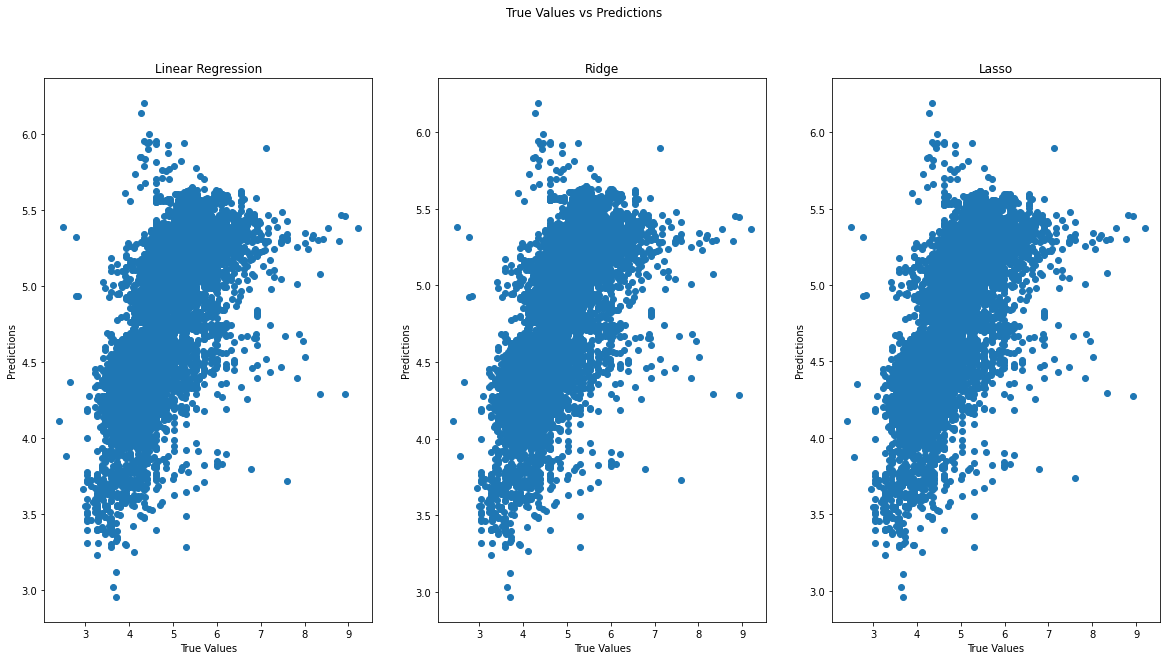

In [258]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, lr_pred)
ax1.set_title('Linear Regression')

ax2.scatter(y_test, pred_ridge)
ax2.set_title('Ridge')

ax3.scatter(y_test, pred_Lasso)
ax3.set_title('Lasso')

for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

# Treino - k Fold = 10

In [259]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

In [260]:
### K-Fold Cross Validation ###

kfold_cv=KFold(n_splits = 10)
for train_index, test_index in kfold_cv.split(df_x,df_y):
    X_train, X_test = df_x[train_index], df_x[test_index]
    y_train, y_test = df_y[train_index], df_y[test_index]

In [261]:
##Linear Regression
lr10 = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr10.fit(X_train, y_train)
lr_pred10= lr10.predict(X_test)

#Ridge Model
ridge_model10 = Ridge(alpha = 0.01, normalize = True)
ridge_model10.fit(X_train, y_train)             
pred_ridge10 = ridge_model10.predict(X_test) 

#Lasso Model
Lasso_model10 = Lasso(alpha = 0.001, normalize =False)
Lasso_model10.fit(X_train, y_train)
pred_Lasso10 = Lasso_model10.predict(X_test) 

In [262]:
print('------------- Linear Regression Fold = 10 -----------')

print('MAE: %f'% mean_absolute_error(y_test, lr_pred10))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred10)))   
print('R2 %f' % r2_score(y_test, lr_pred10))

------------- Linear Regression Fold = 10 -----------
MAE: 0.399998
RMSE: 0.550990
R2 0.488976


In [263]:
print('--------------- Ridge Fold = 10 ---------------------')

print('MAE: %f'% mean_absolute_error(y_test, pred_ridge10))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, pred_ridge10)))   
print('R2 %f' % r2_score(y_test, pred_ridge10))

--------------- Ridge Fold = 10 ---------------------
MAE: 0.400650
RMSE: 0.551755
R2 0.487556


In [264]:
print('--------------- Lasso Fold = 10 ---------------------')

print('MAE: %f' % mean_absolute_error(y_test, pred_Lasso10))
print('RMSE: %f' % np.sqrt(mean_squared_error(y_test, pred_Lasso10)))
print('R2 %f' % r2_score(y_test, pred_Lasso10))

--------------- Lasso Fold = 10 ---------------------
MAE: 0.400138
RMSE: 0.551495
R2 0.488039


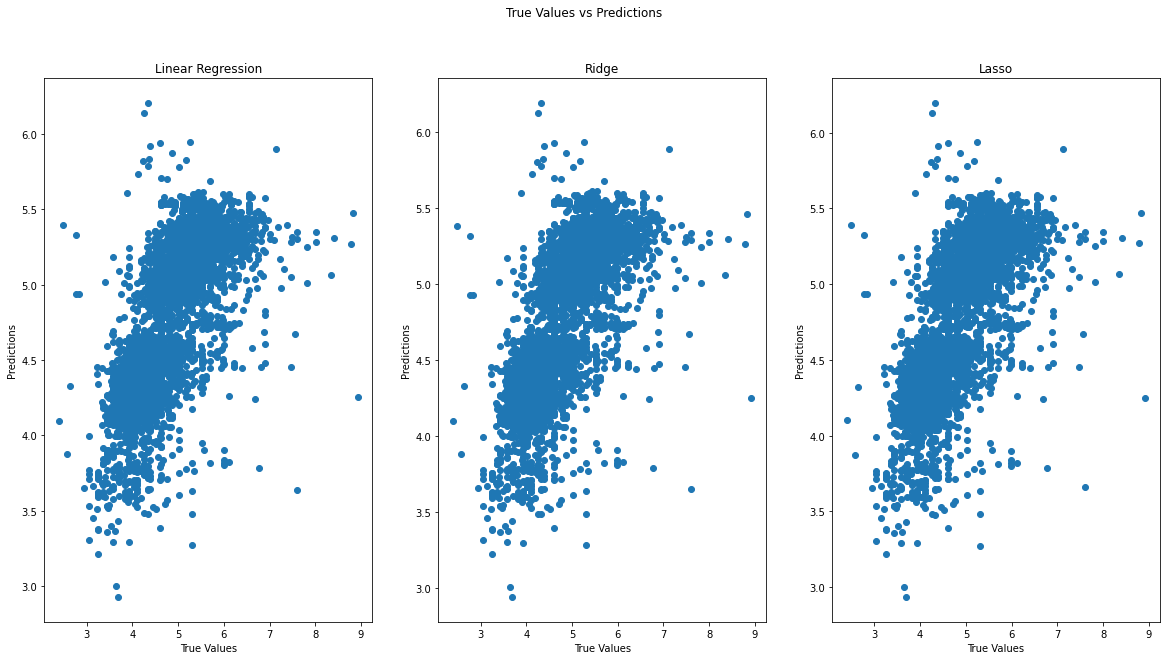

In [265]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, lr_pred10)
ax1.set_title('Linear Regression')

ax2.scatter(y_test, pred_ridge10)
ax2.set_title('Ridge')

ax3.scatter(y_test, pred_Lasso10)
ax3.set_title('Lasso')

for ax in fig.get_axes():
    ax.set(xlabel='True Values', ylabel='Predictions')

# Comparação dos Resultados

------------- Linear Regression Fold = 5 -----------

MAE: 0.391340

RMSE: 0.538368

R2 0.497618

------------- Linear Regression Fold = 10 -----------

MAE: 0.399998

RMSE: 0.550990

R2 0.488976





#################################

--------------- Ridge Fold = 5 ---------------------

MAE: 0.391743

RMSE: 0.538921

R2 0.496584

--------------- Ridge Fold = 10 ---------------------

MAE: 0.400650

RMSE: 0.551755

R2 0.487556

#################################

--------------- Lasso Fold = 5 ---------------------

MAE: 0.390916

RMSE: 0.538550

R2 0.497277

--------------- Lasso Fold = 10 ---------------------

MAE: 0.400138

RMSE: 0.551495

R2 0.488039